Develop a demand forecasting model for optimizing inventory management. The goal is to help businesses predict future product demand accurately, reduce stock shortages, and prevent overstocking.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [17]:
# Load dataset 
df = pd.read_csv("sales_data.csv")




In [18]:
df.head

<bound method NDFrame.head of             date  store_id  product_id  sales  price  promotion  holiday
0     2023-01-01         1         101    122  47.08          1        0
1     2023-01-02         1         101    199  47.63          0        0
2     2023-01-03         1         101    112  33.14          0        0
3     2023-01-04         1         101     34  40.25          0        0
4     2023-01-05         1         101    126  32.55          0        0
...          ...       ...         ...    ...    ...        ...      ...
1820  2023-12-27         5         105     92  14.69          0        0
1821  2023-12-28         5         105    122  31.87          0        0
1822  2023-12-29         5         105    179  31.77          0        0
1823  2023-12-30         5         105     60  21.75          0        0
1824  2023-12-31         5         105    133  19.99          0        0

[1825 rows x 7 columns]>

In [19]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [20]:
# Extract useful time-based features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday

In [21]:
# Sort by date
df = df.sort_values(by="date")


In [22]:
# Drop original date column
df.drop(columns=['date'], inplace=True)

In [23]:
# Define features and target variable
X = df.drop(columns=['sales'])  # Features
y = df['sales']  # Target (demand)


In [24]:
# Split into train and test sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 47.47393579934548
Root Mean Squared Error (RMSE): 55.082716592973284


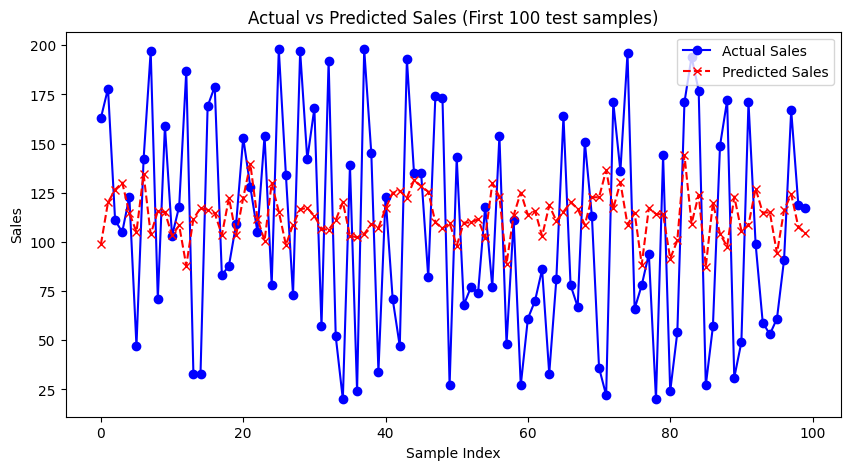

In [26]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label="Actual Sales", color='blue', marker='o')
plt.plot(y_pred[:100], label="Predicted Sales", color='red', linestyle="dashed", marker='x')
plt.legend()
plt.title("Actual vs Predicted Sales (First 100 test samples)")
plt.xlabel("Sample Index")
plt.ylabel("Sales")
plt.show()
